# gtfs2nx demo

#### Install pip package

In [ ]:
!pip install git+https://github.com/ai4up/gtfs2nx@v0.1.0

Alternatively, to incorporate local changes, install the package from source using [poetry](https://python-poetry.org/):

In [ ]:
!poetry build
!pip install ../dist/gtfs2nx-*.whl

#### Download exemplary GTFS feeds

In [1]:
!wget -O gtfs-leipzig-example.zip https://opendata.leipzig.de/dataset/8803f612-2ce1-4643-82d1-213434889200/resource/b38955c4-431c-4e8b-a4ef-9964a3a2c95d/download/gtfsmdvlvb.zip

--2023-09-07 20:47:17--  https://opendata.leipzig.de/dataset/8803f612-2ce1-4643-82d1-213434889200/resource/b38955c4-431c-4e8b-a4ef-9964a3a2c95d/download/gtfsmdvlvb.zip
Resolving opendata.leipzig.de (opendata.leipzig.de)... 212.122.61.237
Connecting to opendata.leipzig.de (opendata.leipzig.de)|212.122.61.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8085466 (7.7M) [application/zip]
Saving to: ‘gtfs-leipzig-example.zip’

gtfs-leipzig-exampl 100%[===================>]   7.71M   953KB/s    in 7.9s    

2023-09-07 20:47:25 (1005 KB/s) - ‘gtfs-leipzig-example.zip’ saved [8085466/8085466]



#### Create routable graph

In [2]:
import gtfs2nx as gx

path = 'gtfs-leipzig-example.zip'
G = gx.transit_graph(path, time_window=('06:00', '10:00'))

2023-09-07 20:47:38,829 | INFO | STEP 1/5 - Loading GTFS feed(s) ...
2023-09-07 20:47:46,729 | INFO | STEP 2/5 - Preprocessing GTFS feeds ...


/Users/fnachtigall/workspace/transit-access/.conda/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/fnachtigall/workspace/transit-access/.conda/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


2023-09-07 20:47:51,110 | INFO |          - Filtering transit service between 06:00 and 10:00...
2023-09-07 20:48:07,639 | INFO | STEP 3/5 - Determining service frequency, transfer waiting & travel times...
2023-09-07 20:48:59,239 | INFO | STEP 4/5 - Creating NetworkX graph...
2023-09-07 20:48:59,675 | INFO | STEP 5/5 - Adding edges for walk transfers between stops no more than 200 m apart (assuming walk speed of 4 km/h)...


#### Inspect graph

/Users/fnachtigall/workspace/transit-access/.conda/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: title={'center': 'frequency'}>

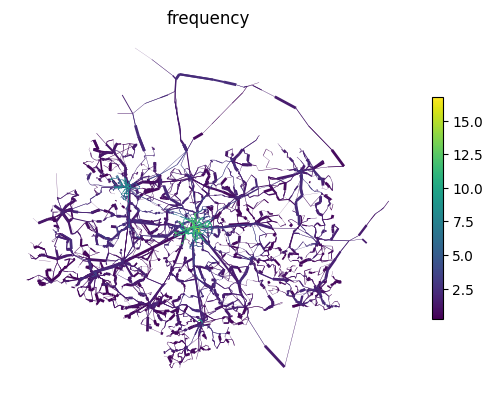

In [4]:
# visualize service frequency of stops

gx.utils.plot_network(G, 'frequency')

In [39]:
# inspect transit segments and stops

edges = gx.utils.edges_to_gdf(G)
nodes = gx.utils.nodes_to_gdf(G)

nodes.head()

,y,x,headway,frequency,route_id,route_type,route_short_name,geometry
000000145@@LVTRAM3,5.693127e+06,322236.255556,0.137543,11.75,LVTRAM3,0,3,POINT (322236.256 5693126.673)
000011276@@LVTRAM3,5.693408e+06,322623.268414,0.134857,6.75,LVTRAM3,0,3,POINT (322623.268 5693407.762)
000013282@@LVTRAM3,5.692867e+06,321838.045455,0.139722,11.50,LVTRAM3,0,3,POINT (321838.045 5692867.487)
000000152@@LVBUS_70,5.690899e+06,319051.683819,0.232713,5.75,LVBUS_70,3,70,POINT (319051.684 5690899.213)
000011061@@LVBUS_70,5.690714e+06,319119.735617,0.229270,6.00,LVBUS_70,3,70,POINT (319119.736 5690714.118)


<Axes: >

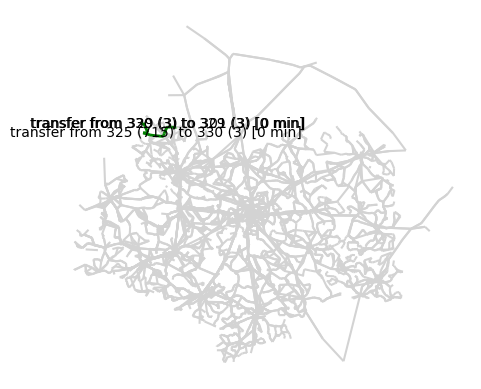

In [33]:
# plot route through transit network

nodes = gx.utils.nodes_to_df(G)
gx.utils.plot_route(G, nodes.index[3340], nodes.index[3333])

/Users/fnachtigall/workspace/transit-access/.conda/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


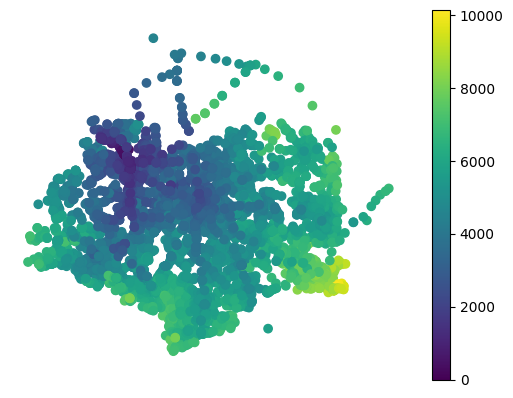

In [37]:
# plot travel time through transit network

import networkx as nx

nodes = gx.utils.nodes_to_gdf(G)
travel_times = nx.single_source_dijkstra_path_length(G, source=nodes.index[2222], weight='weight')
nodes['travel_time'] = nodes.index.map(travel_times)

nodes.plot('travel_time', legend=True).set_axis_off()
